In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv(r'C:\Users\Mohit\Desktop\ML-MINI_PROJECT\datasets\insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

C:\Users\Mohit\AppData\Local\Temp\ipykernel_13232\3634923312.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


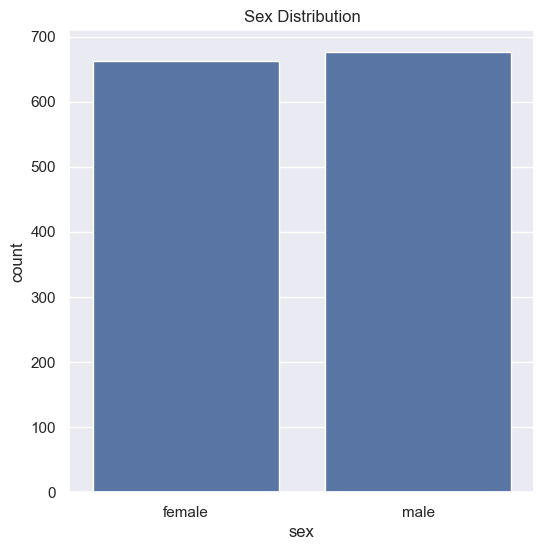

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Mohit\AppData\Local\Temp\ipykernel_14660\1916795400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


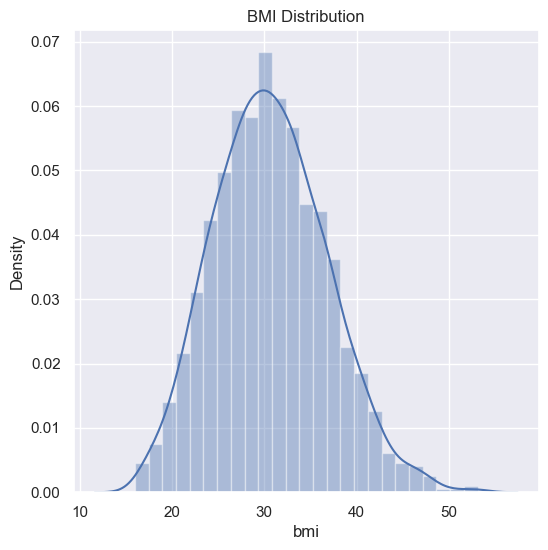

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

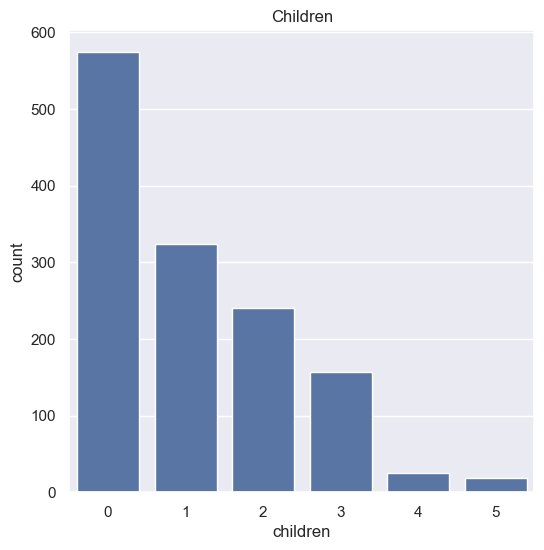

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

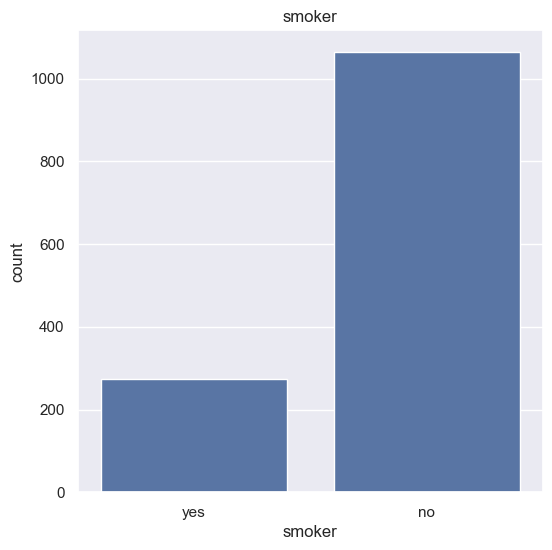

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

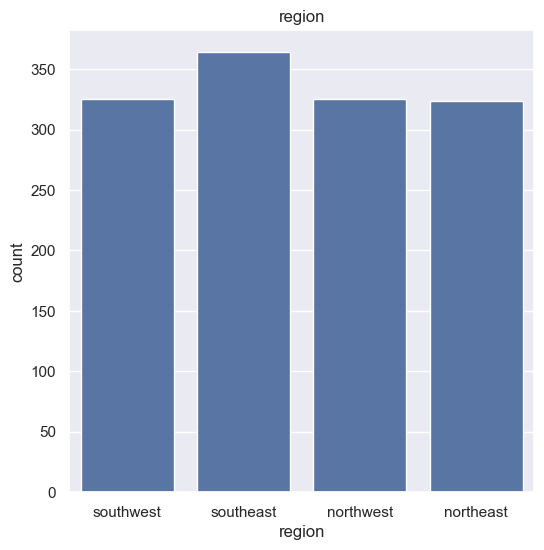

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Mohit\AppData\Local\Temp\ipykernel_14660\3971177022.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


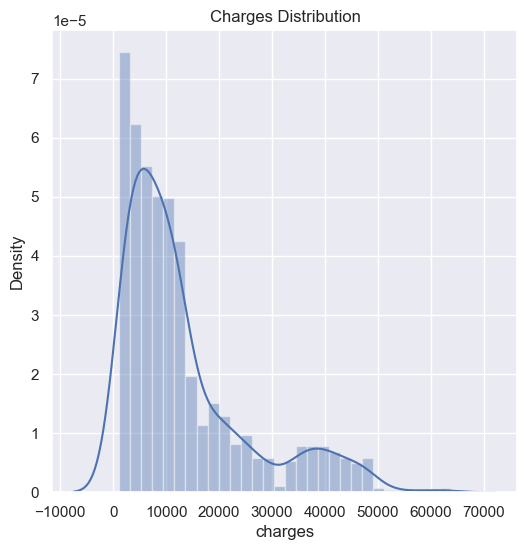

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv(r'C:\Users\Mohit\Desktop\ML-MINI_PROJECT\datasets\insurance.csv')

# Create a binary target variable indicating whether the insurance charges are high or not
insurance_dataset['high_charges'] = np.where(insurance_dataset['charges'] > insurance_dataset['charges'].median(), 1, 0)

# Now, 'high_charges' becomes our target variable for classification
X = insurance_dataset.drop(columns=['charges', 'high_charges'], axis=1)
Y = insurance_dataset['high_charges']

# Encoding categorical variables if necessary
X_encoded = pd.get_dummies(X)  # One-hot encoding for categorical variables

# Print feature names
feature_names = X_encoded.columns.tolist()
print("Feature names:", feature_names)

# Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=2)

# Model Training
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, Y_train)

# Number of input features expected
num_features = logistic_regressor.coef_.shape[1]
print(f"Number of input features expected: {num_features}")

# Print feature names and their corresponding coefficients
feature_coef = pd.DataFrame(list(zip(feature_names, logistic_regressor.coef_[0])), columns=['Feature', 'Coefficient'])
print("\nFeature names and their corresponding coefficients:")
print(feature_coef)

# Model Evaluation
# prediction on training data
training_data_prediction = logistic_regressor.predict(X_train)

# Accuracy score
train_accuracy = metrics.accuracy_score(Y_train, training_data_prediction)
print('\nTraining Accuracy: ', train_accuracy)

# prediction on test data
test_data_prediction = logistic_regressor.predict(X_test)

# Accuracy score
test_accuracy = metrics.accuracy_score(Y_test, test_data_prediction)
print('Test Accuracy: ', test_accuracy)

# R squared value for logistic regression
r2_train = logistic_regressor.score(X_train, Y_train)
print('R squared value for training data:', r2_train)

r2_test = logistic_regressor.score(X_test, Y_test)
print('R squared value for test data:', r2_test)


Feature names: ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
Number of input features expected: 11

Feature names and their corresponding coefficients:
             Feature  Coefficient
0                age     0.157124
1                bmi     0.038199
2           children     0.139083
3         sex_female    -0.123015
4           sex_male    -0.420767
5          smoker_no    -3.914237
6         smoker_yes     3.370455
7   region_northeast     0.331014
8   region_northwest    -0.031228
9   region_southeast    -0.434257
10  region_southwest    -0.409311

Training Accuracy:  0.9102803738317757
Test Accuracy:  0.9440298507462687
R squared value for training data: 0.9102803738317757
R squared value for test data: 0.9440298507462687


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv(r'C:\Users\Mohit\Desktop\ML-MINI_PROJECT\datasets\insurance.csv')

# Now, 'charges' becomes our target variable for regression
X = insurance_dataset.drop(columns=['charges'], axis=1)
Y = insurance_dataset['charges']

# Encoding categorical variables if necessary
X_encoded = pd.get_dummies(X)  # One-hot encoding for categorical variables

# Print feature names
feature_names = X_encoded.columns.tolist()
print("Feature names:", feature_names)

# Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=2)

# Model Training
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=2)  # Using 100 trees
rf_regressor.fit(X_train, Y_train)

# Model Evaluation
# prediction on training data
training_data_prediction = rf_regressor.predict(X_train)

# Calculate RMSE
train_rmse = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('\nTraining RMSE: ', train_rmse)

# Calculate R-squared for training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value for training data:', r2_train)

# prediction on test data
test_data_prediction = rf_regressor.predict(X_test)

# Calculate RMSE
test_rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('Test RMSE: ', test_rmse)

# Calculate R-squared for test data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value for test data:', r2_test)

# Predicting insurance cost for the given input data
# You need to make sure the input data matches the feature set used for training
input_data = np.array([[31, 25.74, 2, 0, 1, 0, 1, 0, 1, 0, 0]])  # Reshape this input as per your model's expectations

predicted_cost = rf_regressor.predict(input_data)
print('\nThe predicted insurance cost is : ', predicted_cost[0])


Feature names: ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

Training RMSE:  1802.7218819547375
R squared value for training data: 0.9776763240293527
Test RMSE:  4889.168687514731
R squared value for test data: 0.8408320068976165

The predicted insurance cost is :  18855.61827149999


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
with open('trained_model.pkl','wb') as file:
    pickle.dump(rf_regressor, file)